In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import collections
from collections import Counter
import matplotlib.pyplot as plt
from random import sample
import csv

# Problem 1

In [2]:
df_pp = pd.read_csv("confidence.ppi", sep="\t", names=["protein1","protein2"], usecols=[0,1])
# print(df_pp)

In [3]:
# a

G_pp = nx.from_pandas_edgelist(df_pp, "protein1", "protein2")
G1 = nx.to_pandas_adjacency(G_pp)
# G1.to_csv("p1a.csv")

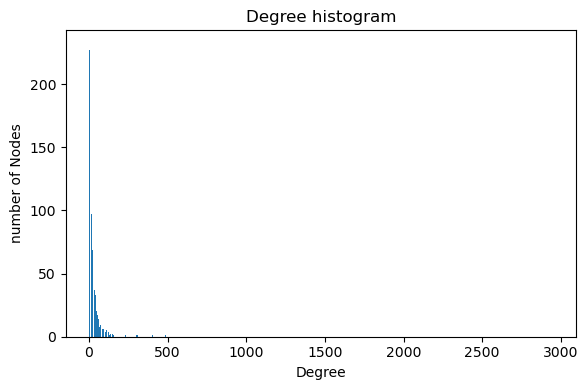

In [4]:
# b

degree_sequence = sorted((d for n, d in G_pp.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree distribution of G_pp", figsize=(6, 4))

ax = fig.add_subplot()
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Degree histogram")
ax.set_xlabel("Degree")
ax.set_ylabel("number of Nodes")

fig.tight_layout()
plt.show()

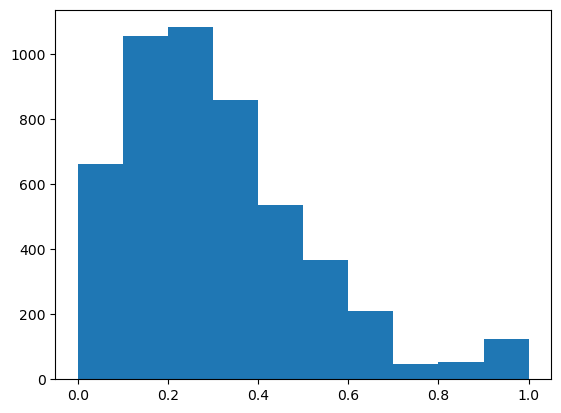

In [5]:
# c

local_cc = nx.clustering(G_pp)
plt.hist(list(local_cc.values()))
plt.show()

df_localcc = pd.DataFrame.from_dict(local_cc, orient='index', columns=['clustering coefficient'])
df_localcc.to_csv("p1c.csv", sep='\t')

In [6]:
print(local_cc['YGR296W'])
print(local_cc['YPL098C'])

0.1
0.8


In [7]:
# d
def triangleNumIn(G):
    num = 0
    nodes = G.nodes();
    for v1 in nodes:
        for v2 in list(G.neighbors(v1)):
            for v3 in list(G.neighbors(v2)):
                if v1 != v3:
                    for v4 in list(G.neighbors(v3)):
                        if v1 == v4:
                            num = num + 1
    
    return num / 6


# nodes = list(G_pp.nodes())[0:30]
# G_sub = G_pp.subgraph(nodes)
print("number of 3-cliques is ", triangleNumIn(G_pp))
# number_of_triangles = sum(nx.triangles(G_pp).values()) / 3
# print(number_of_triangles)
# nx.draw(G_sub)

number of 3-cliques is  354514.0


In [8]:
print("Global Clustering Coefficient of Graph is", nx.average_clustering(G_pp))

Global Clustering Coefficient of Graph is 0.3045684470122461


In [9]:
# e
def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

/var/folders/62/_ks028r90g524dcch6xdgmy00000gn/T/ipykernel_25090/851285957.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  if isinstance(v, collections.MutableMapping):


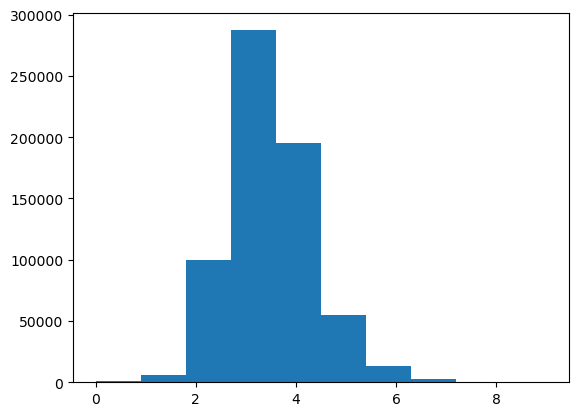

In [10]:
random_nodes = sample(list(G_pp.nodes()), 1000)
G_sub = G_pp.subgraph(random_nodes)
Gpp_SPL = dict(nx.all_pairs_shortest_path_length(G_sub))
Gpp_valdict = flatten(Gpp_SPL, sep='_')
plt.hist(list(Gpp_valdict.values()))
plt.show()

# Problem 2

In [11]:
# a,b
f = open("MIPSFirstLevel.anno3", "r")
lines = f.readlines()
dict_mips = {}
for line in lines:
    line_split = line.strip().split('\t')
    key = line_split[0]
    value = line_split[1:]
    dict_mips[key] = value

In [12]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [13]:
def update_annotation(dict, key):
    value = -1
    list_label = []
    for neighbor in G_pp.neighbors(key):
        list_label.append(dict[neighbor])
    
    flatlist_label = flatten(list_label)
    if flatlist_label != []:
        value = flatlist_label[0]
        c = Counter(flatlist_label)
        value = c.most_common()[0][0]

            
    return value;

In [14]:
def update_annotation_variation(dict, key):
    value = -1
    dict_label = {}
    for neighbor in G_pp.neighbors(key):
        for label in dict[neighbor]:
            if label in dict_label:
                dict_label[label] = dict_label[label] + 1 / len(dict[neighbor])
            else: 
                dict_label[label] = 1 / len(dict[neighbor])
                
    if dict_label != {}:
        value = max(dict_label, key=dict_label.get)
            
    return value;

In [15]:
for key in dict_mips:
    if len(dict_mips[key]) == 0:
#         dict_mips[key].append(update_annotation(dict_mips,key))
        dict_mips[key].append(update_annotation_variation(dict_mips,key))

In [16]:
with open('p2b.csv', 'w') as f:
    for key in dict_mips.keys():
        f.write("%s,%s\n"%(key,dict_mips[key]))
# with open('p2a.csv', 'w') as f:
#     for key in dict_mips.keys():
#         f.write("%s,%s\n"%(key,dict_mips[key]))

In [17]:
# c
f = open("MIPSFirstLevel.anno3", "r")
lines = f.readlines()
dict_mips = {}
for line in lines:
    line_split = line.strip().split('\t')
    key = line_split[0]
    value = line_split[1:]
    dict_mips[key] = value

In [18]:
fail_count = 0
success_count = 0
for key in dict_mips:
    if dict_mips[key]:
        removed_element = dict_mips[key].pop(0)
        pushed_element = update_annotation(dict_mips, key)
        if pushed_element == removed_element:
            success_count = success_count + 1
        else:
            fail_count = fail_count + 1
        dict_mips[key].insert(0, removed_element)

In [19]:
print(success_count)
print(fail_count)
print(success_count/(success_count + fail_count))

1422
3021
0.3200540175557056


In [20]:
fail_count = 0
success_count = 0
for key in dict_mips:
    if dict_mips[key]:
        removed_element = dict_mips[key].pop(0)
        pushed_element = update_annotation_variation(dict_mips, key)
    
        if pushed_element == removed_element:
            success_count = success_count + 1
        else:
            fail_count = fail_count + 1
            
        dict_mips[key].insert(0, removed_element)

In [21]:
print(success_count)
print(fail_count)
print(success_count/(success_count + fail_count))

1493
2950
0.33603421111861353
